# Left-Right symmetric model Lagrangian

In this work, we follow the reference [Deshpande1990](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.44.837)

In [2]:
from sympy import symbols, init_printing, Matrix, I, Add, eye, sqrt, conjugate, trace, factor
from sympy.physics import msigma 
init_printing()

## Covariant derivative

In [3]:
g, gBL = symbols('g, g_{B-L}', positive=True)
W1L, W2L, W3L = symbols('W^1_L, W^2_L, W^3_L', real=True)
WL = [W1L, W2L, W3L]
W1R, W2R, W3R = symbols('W^1_R, W^2_R, W^3_R', real=True)
WR = [W1R, W2R, W3R]
Bmu = symbols('B_\mu', real=True)
B, L = symbols('B, L', real=True)

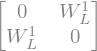

In [4]:
WL[0]*msigma(1)

In [5]:
WsigmaL = Add(*[WL[i]*msigma(i+1) for i in range(3)])
WsigmaR = Add(*[WR[i]*msigma(i+1) for i in range(3)])

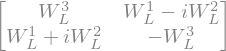

In [6]:
WsigmaL

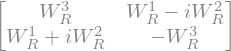

In [7]:
WsigmaR

In [8]:
WLp, WLm, WRp, WRm = symbols('W_L^+, W_L^-, W_R^+, W_R^-')
Wcharge_subs = {
    W1L - I*W2L:WLp,
    W1L + I*W2L:WLm,
    W1R - I*W2R:WRp,
    W1R + I*W2R:WRm
}

In [9]:
WsigmaL, WsigmaR = WsigmaL.subs(Wcharge_subs), WsigmaR.subs(Wcharge_subs)

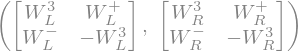

In [10]:
WsigmaL, WsigmaR

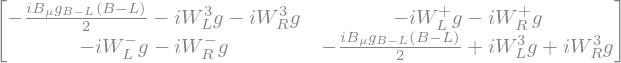

In [11]:
Dmu = -g*I*WsigmaL - g*I*WsigmaR - I*gBL*(B-L)/2*Bmu*eye(2)
Dmu

## Scalars

### Triplets

In [12]:
deltaLp, deltaLpp = symbols(r'\delta_L^+, \delta_L^{++}')
deltaRp, deltaRpp = symbols(r'\delta_R^+, \delta_R^{++}')

deltaLm, deltaLmm = symbols(r'\delta_L^-, \delta_L^{--}')
deltaRm, deltaRmm = symbols(r'\delta_R^-, \delta_R^{--}')

deltaL0 = symbols(r'\delta_L^0', real=True)
deltaR0 = symbols(r'\delta_R^0', real=True)

In [13]:
sqrt2 = sqrt(2)
DeltaL = Matrix(
    [
        [deltaLp/sqrt2, deltaLpp],
        [deltaL0, -deltaLp/sqrt2]
    ]
)
DeltaR = Matrix(
    [
        [deltaRp/sqrt2, deltaRpp],
        [deltaR0, -deltaRp/sqrt2]
    ]
)

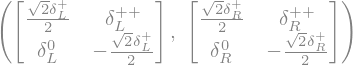

In [14]:
DeltaL, DeltaR

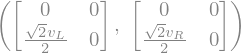

In [92]:
vL, vR = symbols('v_L, v_R', positive=True)
vevL = {deltaL0:vL/sqrt2, deltaLp:0, deltaLpp:0}
vevR = {deltaR0:vR/sqrt2, deltaRp:0, deltaRpp:0}
DeltaL.subs(vevL), DeltaR.subs(vevR)

In [16]:
Dmu_DeltaL = -I*g/2*(WsigmaL*DeltaL - DeltaL*WsigmaL) - I*gBL/2*Bmu*DeltaL # B -L = 1 for triplets L and R
Dmu_DeltaR = -I*g/2*(WsigmaR*DeltaR - DeltaR*WsigmaR) - I*gBL/2*Bmu*DeltaR

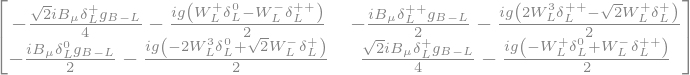

In [17]:
Dmu_DeltaL

In [18]:
conjugate_fields = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    conjugate(deltaLpp):deltaLmm,
    conjugate(deltaLmm):deltaLpp,
    conjugate(deltaRm):deltaRp,
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRmm):deltaRpp,
    conjugate(deltaRpp):deltaRmm,
    conjugate(WLp):WLm,
    conjugate(WLm):WLp,
    conjugate(WRm):WRp,
    conjugate(WRp):WRm
}

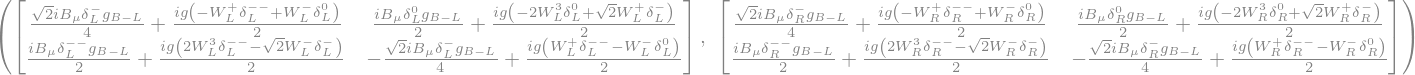

In [19]:
Dmu_DeltaL_dagger = conjugate(Dmu_DeltaL.T).subs(conjugate_fields)
Dmu_DeltaR_dagger = conjugate(Dmu_DeltaR.T).subs(conjugate_fields)

Dmu_DeltaL_dagger, Dmu_DeltaR_dagger


In [20]:
Dmu_DL_Dmu = (Dmu_DeltaL_dagger*Dmu_DeltaL).subs(vevL)
Dmu_DL_Dmu.shape

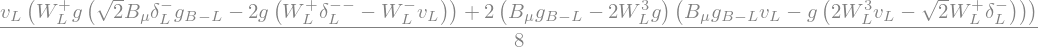

In [21]:
Dmu_DL_Dmu[0,0].simplify()

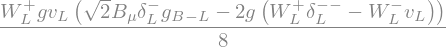

In [22]:
Dmu_DL_Dmu[1,1].simplify()

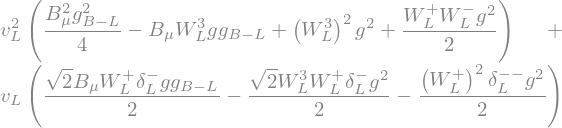

In [23]:
Tr_DmuL = trace(Dmu_DL_Dmu).expand().collect(vL)
Tr_DmuL

In [24]:
Dmu_DR_Dmu = (Dmu_DeltaR_dagger*Dmu_DeltaR).subs(vevR)

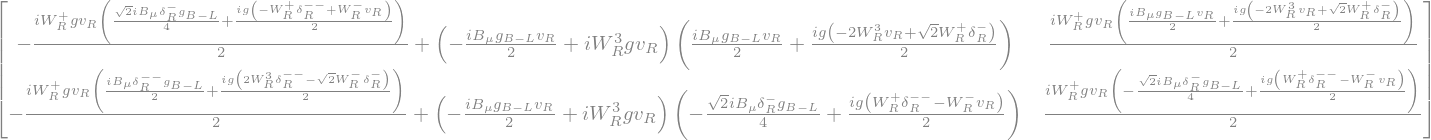

In [25]:
Dmu_DR_Dmu

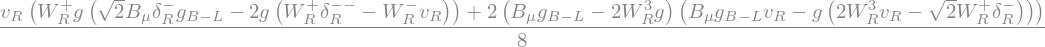

In [26]:
Dmu_DR_Dmu[0,0].simplify()

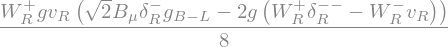

In [27]:
Dmu_DR_Dmu[1,1].simplify()

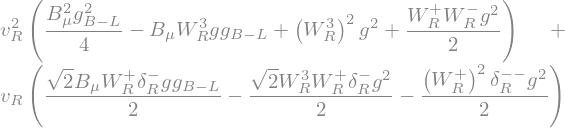

In [28]:
Tr_DmuR = trace(Dmu_DR_Dmu).expand().collect(vR)
Tr_DmuR

### Bidoublet

In [135]:
phi1p, phi1m = symbols(r'\phi_1^+, \phi_1^-')
phi2p, phi2m = symbols(r'\phi_2^+, \phi_2^-')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

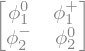

In [136]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [phi2m, phi20]
    ]
)
Phi

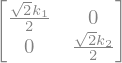

In [168]:
k1, k2 = symbols("k_1, k_2")
vevPhi = {phi10:k1/sqrt2, phi20:k2/sqrt2, phi1p:0, phi2m:0, phi2p:0, phi1m:0}
Phi.subs(vevPhi)

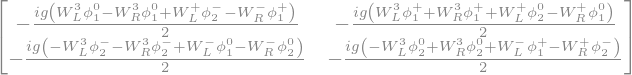

In [169]:
Dmu_Phi = -I*g/2*(WsigmaL*Phi - Phi*WsigmaR) # B - L = 0 for the bidoublet
Dmu_Phi

In [170]:
conjugate_scalarsPhi = {
    conjugate(phi1p):phi1m,
    conjugate(phi2p):phi2m,
    conjugate(phi1m):phi1p,
    conjugate(phi2m):phi2p
}

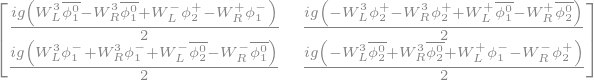

In [171]:
Dmu_Phi_dagger = conjugate(Dmu_Phi.T).subs(conjugate_scalarsPhi).subs(conjugate_fields)
Dmu_Phi_dagger

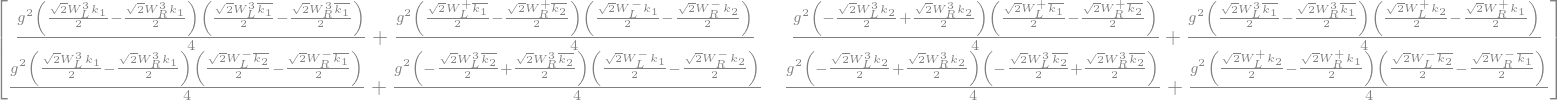

In [172]:
Dmu_Phi_Dmu = (Dmu_Phi_dagger*Dmu_Phi).subs(vevPhi)
Dmu_Phi_Dmu

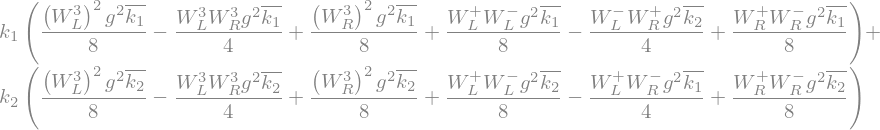

In [173]:
Tr_DmuPhi = trace(Dmu_Phi_Dmu).expand().collect([k1,k2])
Tr_DmuPhi 

### Kinetic Higgs lagrangian

In [174]:
LHiggs = Tr_DmuL + Tr_DmuR + Tr_DmuPhi 

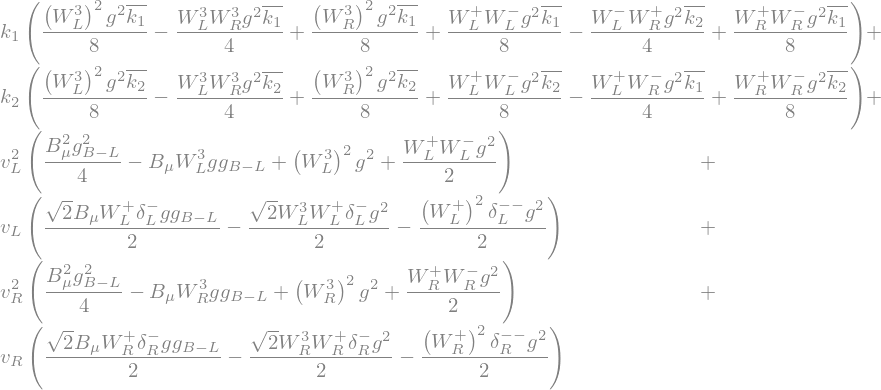

In [175]:
LHiggs

#### $W^\pm$ mass matrix

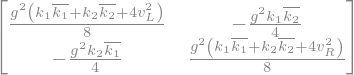

In [176]:
MW11 = LHiggs.diff(WLm, WLp)
MW12 = LHiggs.diff(WLm, WRp)
MW21 = LHiggs.diff(WRm, WLp)
MW22 = LHiggs.diff(WRm, WRp)

MW = Matrix(
    [
        [MW11, MW12],
        [MW21, MW22]
    ]
)
MW

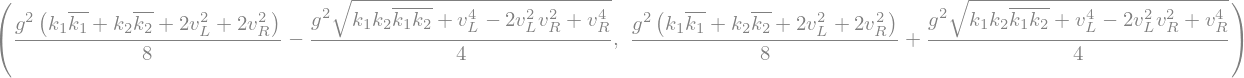

In [177]:
MW1square, MW2square = list(MW.eigenvals().keys())
MW1square, MW2square

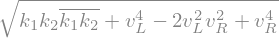

In [178]:
sqrt_vevs = MW1square.args[0].args[2]
sqrt_vevs

In [179]:
sqrt_vevs_sim = (sqrt_vevs.args[0] - k1**2*k2**2).factor() + k1**2*k2**2
sqrt_vevs_sim

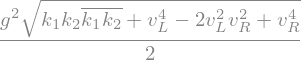

In [180]:
-MW1square + MW2square

Following the hierarchy $v_R >> k$ and $k_1 >> v_L$
$$ \sqrt{k^{2} k_{1}^{2} + \frac{\left(v_{L} - v_{R}\right)^{2} \left(v_{L} + v_{R}\right)^{2}}{4}} \approx 
\sqrt{k^{2} k_{1}^{2} + \frac{v_{R}^4}{4}} = \frac{v_R^2}{2}\sqrt{1+x}
$$
where $x = \frac{4 k^2k_1^2}{v_R^4} << 1$. Then we can use the aproximation $\sqrt{1+x} \approx 1 +\frac{x}{2}$ 

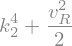

In [181]:
x = (4*k2**2*k2**2)/vR**2
sqrt_vevs_approx = ((vR**2/2)*(1 + x/2)).simplify()
sqrt_vevs_approx

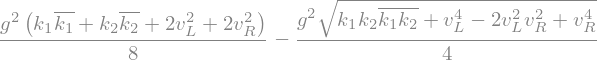

In [182]:
MW1square

In [183]:
kp_square, km_square = symbols('k_+^2, k_-^2', positive=True)
k2pm_subs = {
    k1**2 + k2**2: kp_square,
    k1**2 - k2**2: km_square
}
k2pm_subs

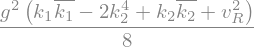

In [184]:
MW1square.subs(sqrt_vevs, sqrt_vevs_approx).subs(k2pm_subs).subs(vL,0).expand().collect(kp_square, factor)

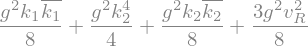

In [185]:
MW2square.subs(sqrt_vevs, sqrt_vevs_approx).subs(k2pm_subs).subs(vL,0).expand().collect(kp_square)


In this approximation 
$$M_{W_2}^2 \approx \frac{g^2}{4}k_+^2\left(1 - \frac{2 k^2 k_1^2}{k_+^2} \right)$$
$$M_{W_2}^2 \approx \frac{g^2}{4}v_R^2$$

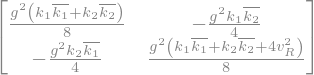

In [186]:
MW.subs(k2pm_subs).subs(vL,0)

#### Neutral boson mass matrix

In [187]:
from sympy.tensor.array import derive_by_array

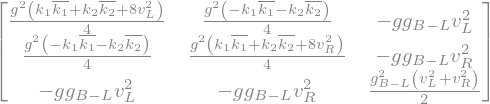

In [188]:
WLWRB = [W3L, W3R, Bmu]
M0_square = derive_by_array(derive_by_array(LHiggs, WLWRB), WLWRB).simplify().tomatrix()
M0_square

In [189]:
M0_square = M0_square.subs(k2pm_subs)

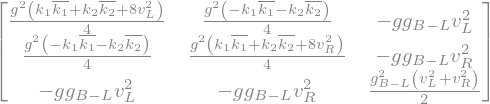

In [190]:
M0_square

In [191]:
MZ1_square, MZ2_square, MA_square = list((M0_square.subs(vL,0)).eigenvals().keys()) # list(MW.eigenvals().keys())

In [192]:
MA_square

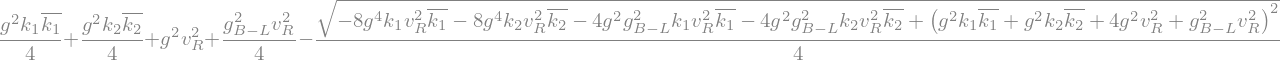

In [193]:
MZ1_square

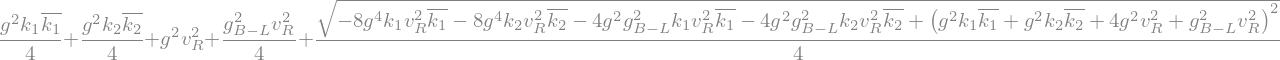

In [194]:
MZ2_square

In [195]:
((MZ2_square - MZ1_square)*2).args[0].collect(vR, factor)

Following the hierarchy $v_R >> k$ and $k_1 >> v_L$
$$ \sqrt{4 g^{4} \left(k^{2}_{+}\right)^{2} + 16 g^{4} v_{R}^{4} - 4 g^{2} g_{B-L}^{2} k^{2}_{+} v_{R}^{2} + 8 g^{2} g_{B-L}^{2} v_{R}^{4} + g_{B-L}^{4} v_{R}^{4}} \approx 
\sqrt{} = \frac{1}{2}\sqrt{1+x}
$$
where $x = \frac{4 k^2k_1^2}{v_R^4} << 1$. Then we can use the aproximation $\sqrt{1+x} \approx 1 +\frac{x}{2}$ 

## Scalar potential and Higgs mass spectrum

In [196]:
from sympy.physics.quantum import Dagger
from sympy import solve

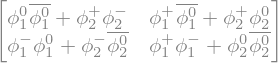

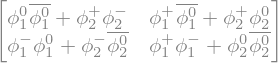

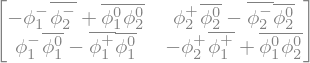

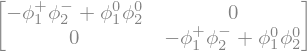

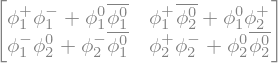

In [197]:
PhiDagger = Dagger(Phi).subs(conjugate_scalarsPhi)
Phitilde = msigma(2)*conjugate(Phi)*msigma(2)
PhitildeDagger = Dagger(Phitilde).subs(conjugate_scalarsPhi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiDaggerPhi)

#Phitilde
PhitildePhiDagger = Phitilde*PhiDagger
display(PhitildePhiDagger)

#PhitildeDagger
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)

PhiDaggerPhitilde = PhiDagger*Phitilde

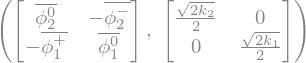

In [199]:
Phitilde, Phitilde.subs(vevPhi)

In [200]:
conjugate_scalars_deltaL = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    conjugate(deltaLpp):deltaLmm,
    conjugate(deltaLmm):deltaLpp
}

conjugate_scalars_deltaR = {
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRm):deltaRp,
    conjugate(deltaRpp):deltaRmm,
    conjugate(deltaRmm):deltaRpp
}

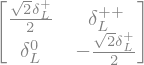

In [201]:
DeltaL

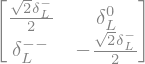

In [202]:
DeltaLDagger = Dagger(DeltaL).subs(conjugate_scalars_deltaL)
DeltaLDagger

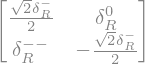

In [203]:
DeltaRDagger = Dagger(DeltaR).subs(conjugate_scalars_deltaR)
DeltaRDagger

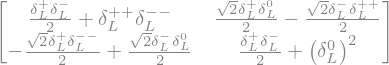

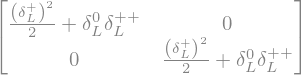

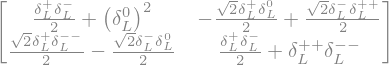

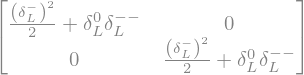

In [204]:
DeltaLDeltaLDagger = DeltaL*DeltaLDagger
display(DeltaLDeltaLDagger)
DeltaLDeltaL = DeltaL*DeltaL
display(DeltaLDeltaL)
DeltaLDaggerDeltaL = DeltaLDagger*DeltaL
display(DeltaLDaggerDeltaL)
DeltaLDaggerDeltaLDagger = DeltaLDagger*DeltaLDagger
display(DeltaLDaggerDeltaLDagger)

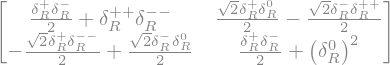

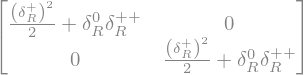

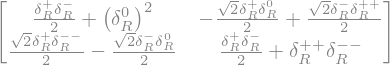

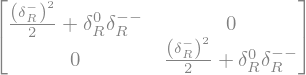

In [205]:
DeltaRDeltaRDagger = DeltaR*DeltaRDagger
display(DeltaRDeltaRDagger)
DeltaRDeltaR = DeltaR*DeltaR
display(DeltaRDeltaR)
DeltaRDaggerDeltaR = DeltaRDagger*DeltaR
display(DeltaRDaggerDeltaR)
DeltaRDaggerDeltaRDagger = DeltaRDagger*DeltaRDagger
display(DeltaRDaggerDeltaRDagger)

### Higgs potential

In [206]:
mu12, mu22, mu32 = symbols(r'\mu_1^2, \mu_2^2, \mu_3^2', real=True)
lamb1, lamb2, lamb3, lamb4 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4', real=True)
rho1, rho2, rho3, rho4 = symbols(r'\rho_1, \rho_2, \rho_3, \rho_4', real=True)
alpha1, alpha3 = symbols(r'\alpha_1, \alpha_3', real=True)
alpha2 = symbols(r'\alpha_2')
beta1, beta2, beta3 = symbols(r'beta_1, beta_2, beta_3', real=True)

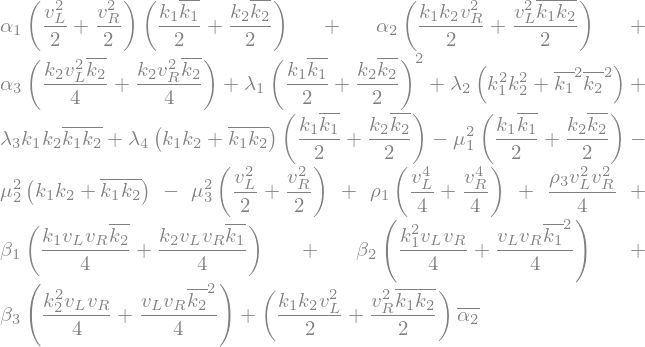

In [207]:
VLRPhi = (
    -mu12*trace(PhiDaggerPhi)
    - mu22*(trace(Phitilde*PhiDagger) + trace(PhitildeDagger*Phi))
    -mu32*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + lamb1*(trace(PhiDaggerPhi))**2
    + lamb2*(trace(PhitildePhiDagger)**2 + trace(PhitildeDaggerPhi)**2)
    + lamb3*trace(PhitildePhiDagger)*trace(PhitildeDaggerPhi)
    + lamb4*trace(PhiPhiDagger)*(trace(PhitildePhiDagger) + trace(PhitildeDaggerPhi))
    + rho1*(trace(DeltaLDeltaLDagger)**2 + trace(DeltaRDeltaRDagger)**2)
    + rho2*(trace(DeltaLDeltaL)*trace(DeltaLDaggerDeltaLDagger) + trace(DeltaRDeltaR)*trace(DeltaRDaggerDeltaRDagger))
    + rho3*trace(DeltaLDeltaLDagger)*trace(DeltaRDeltaRDagger)
    + rho4*(trace(DeltaLDeltaL)*trace(DeltaRDaggerDeltaRDagger) + trace(DeltaLDaggerDeltaLDagger)*trace(DeltaRDeltaR))
    + alpha1*trace(PhiPhiDagger)*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + alpha2*(
        trace(PhiPhitildeDagger)*trace(DeltaRDeltaRDagger) + trace(PhiDaggerPhitilde)*trace(DeltaLDeltaLDagger) 
    )
    + conjugate(alpha2)*(
        trace(PhiDaggerPhitilde)*trace(DeltaRDeltaRDagger) + trace(PhitildeDaggerPhi)*trace(DeltaLDeltaLDagger)
    )
    + alpha3*(trace(PhiPhiDagger*DeltaLDeltaLDagger) + trace(PhiDaggerPhi*DeltaRDeltaRDagger))
    + beta1*(trace(Phi*DeltaR*PhiDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phi*DeltaRDagger))
    + beta2*(trace(Phitilde*DeltaR*PhiDagger*DeltaLDagger) + trace(PhitildeDagger*DeltaL*Phi*DeltaRDagger))
    + beta3*(trace(Phi*DeltaR*PhitildeDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phitilde*DeltaRDagger))
)
VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

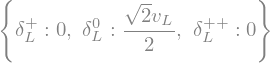

In [208]:
vevL

In [209]:
vLr, vLi = symbols('{{v_L^r}}, {{v_L^i}}', real=True)
k2r, k2i = symbols('{{k_2^r}}, {{k_2^i}}', real=True)


In [210]:
VLRPhi_vev = VLRPhi.subs(vevL).subs(vevR).subs(vevPhi).subs(
    {
        vL: vLr + I*vLi,
        k2: k2r + I*k2i,
    }
)

In [211]:
from sympy import Symbol

In [212]:
scalar_vevs = [vR, k1, k2r, vLr, k2i, vLi]
V_diff = []
for vev in scalar_vevs:
    term = VLRPhi_vev.diff(vev)
    V_diff.append(term)
    display(term.atoms(Symbol))

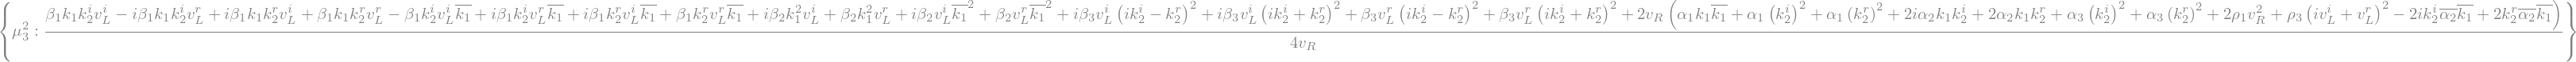

In [213]:
mu32_min = solve(V_diff[0], [mu32], dict=True)[0]
mu32_min

In [214]:
mu122_min = solve(V_diff[1:3], [mu12, mu22], dict=True)[0]
mu122_min

KeyboardInterrupt: 

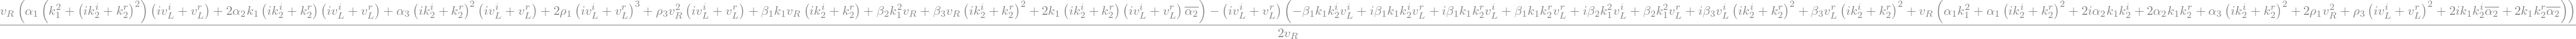

In [ ]:
V_diff[3].subs(mu32_min).simplify()

In [ ]:
V_diff[4].subs(mu122_min).simplify()

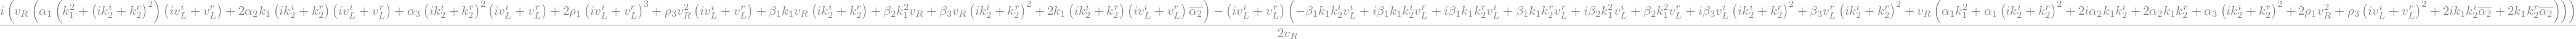

In [ ]:
V_diff[5].subs(mu32_min).simplify()

Expand neutral fields in terms of real and imaginary parts
$$F = \frac{1}{\sqrt{2}}(F^r + i F^i)$$

In [215]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
deltaR0r, deltaR0i = symbols(r'\delta_R^{0r}, \delta_R^{0i}', real=True)
deltaL0r, deltaL0i = symbols(r'\delta_L^{0r}, \delta_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (phi10r + I*phi10i)/sqrt2,
    phi20: (phi20r + I*phi20i)/sqrt2,
    deltaR0: (deltaR0r + I*deltaR0i)/sqrt2,
    deltaL0: (deltaL0r + I*deltaL0i)/sqrt2
}

In [216]:
VLRPhi_ri = VLRPhi.subs(complex_scalar_fields)

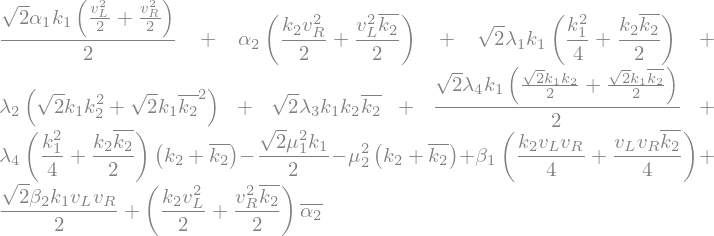

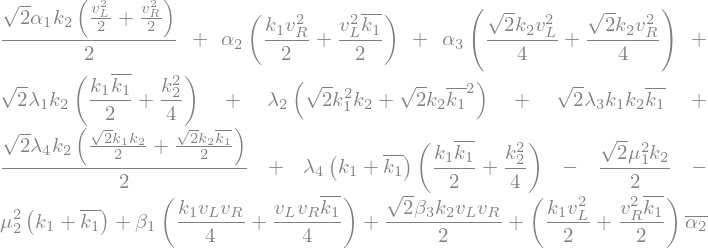

In [217]:
tadpol1 = VLRPhi.subs(phi10, (phi10r + I*phi10i)/sqrt2).diff(phi10r).subs(vevPhi).subs(vevL).subs(vevR).subs(
    {
        phi10r: k1/sqrt2, phi10i: 0
    }
)
display(tadpol1)
tadpol2 = VLRPhi.subs(phi20, (phi20r + I*phi20i)/sqrt2).diff(phi20r).subs(vevPhi).subs(vevL).subs(vevR).subs(
    {
        phi20r: k2/sqrt2, phi20i: 0
    }
)
tadpol2

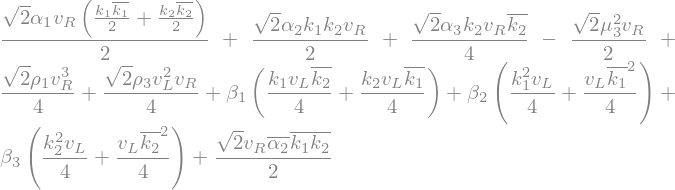

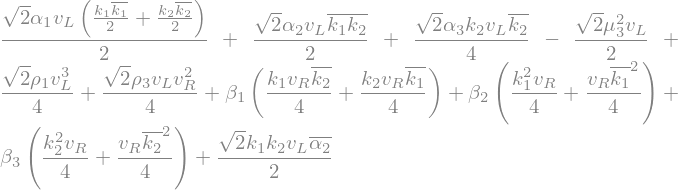

In [218]:
tadpol3 = VLRPhi.subs(deltaR0, (deltaR0r + I*deltaR0i)/sqrt2).diff(deltaR0r).subs(vevR).subs(vevPhi).subs(vevL).subs(
    {
        deltaR0r: vR/sqrt2, deltaR0i: 0
    }
)
display(tadpol3)
tadpol4 = VLRPhi.subs(deltaL0, (deltaL0r + I*deltaL0i)/sqrt2).diff(deltaL0r).subs(vevL).subs(vevPhi).subs(vevR).subs(
    {
        deltaL0r: vL/sqrt2, deltaL0i: 0
    }
)
tadpol4

In [219]:
tadpole12_sol = solve([tadpol1, tadpol2], [mu12, mu22], dict=True)[0]

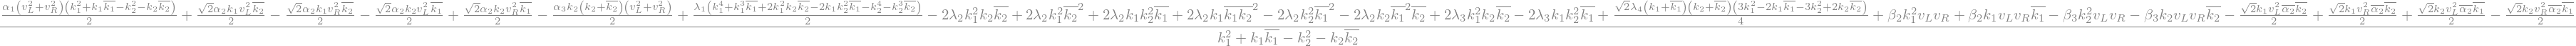

In [220]:
tadpole12_sol[mu12].subs(k2pm_subs).collect([alpha1, alpha3, lamb1, lamb4], factor).simplify()#.factor()

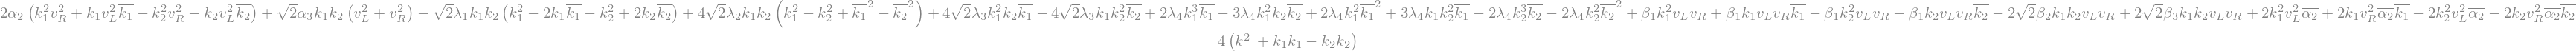

In [221]:
tadpole12_sol[mu22].simplify().subs(k2pm_subs).collect([alpha2, alpha3, lamb1, lamb2], factor).simplify()

In [222]:
tadpole34_sol = solve([tadpol3, tadpol4], [mu32, beta2], dict=True)[0]

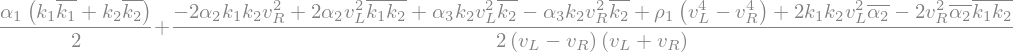

In [223]:
tadpole34_sol[mu32].collect(alpha1, factor).subs(k2pm_subs).collect(rho1)

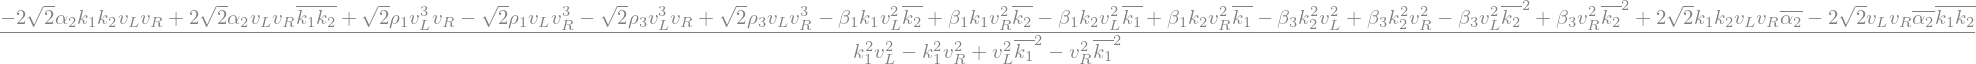

In [224]:
tadpole34_sol[beta2].simplify()

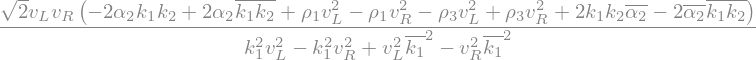

In [225]:
tadpole34_sol[beta2].simplify().subs(beta3, beta1).subs(beta1,0).simplify()

## Yukawa charged lepton sector

In [226]:
from sympy import IndexedBase, Idx

In [ ]:
#Indexed?

In [268]:
i,j = symbols('i, j', cls=Idx)
#h = IndexedBase('h')
#ht = IndexedBase(r'\tilde{h}')
fij = symbols(r'f_{ij}')
gij = symbols(r'g_{ij}')
hMij = symbols(r'h_{Mij}')

In [247]:
#ht[i, j]

In [285]:
nueL, numuL, nutauL = symbols(r'{{\nu_{L}}}_e, {{\nu_{L}}}_\mu, {{\nu_{L}}}_\tau')
nueR, numuR, nutauR = symbols(r'{{\nu_{R}}}_e, {{\nu_{R}}}_\mu, {{\nu_{R}}}_\tau')
nuL = IndexedBase(r'{{\nu_{L}}}')
nuR = IndexedBase(r'{{\nu_{R}}}')
nuLc = IndexedBase(r'{{\nu_{L}^c}}')
nuRc = IndexedBase(r'{{\nu_{R}^c}}')
eL, muL, tauL = symbols(r'e_L, \mu_L, \tau_L')
eR, muR, tauR = symbols(r'e_R, \mu_R, \tau_R')
lL = IndexedBase('{{l_L}}')
lR = IndexedBase('{{l_R}}')

In [286]:
nueL, nuL[i]

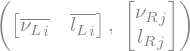

In [287]:
LLi = Matrix(
    [
        [nuL[i]],
        [lL[i]]
    ]
)
LRj = Matrix(
    [
        [nuR[j]],
        [lR[j]]
    ]
)
Dagger(LLi), LRj

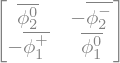

In [288]:
Phitilde

In [289]:
hMij

In [290]:
from sympy.physics.matrices import msigma

In [305]:
LY = (Dagger(LLi)*(fij*Phi + gij*Phitilde)*LRj)[0] + I*hMij*((LLi.T*msigma(2)*DeltaL*LLi)[0] + (LRj.T*msigma(2)*DeltaR*LRj)[0])

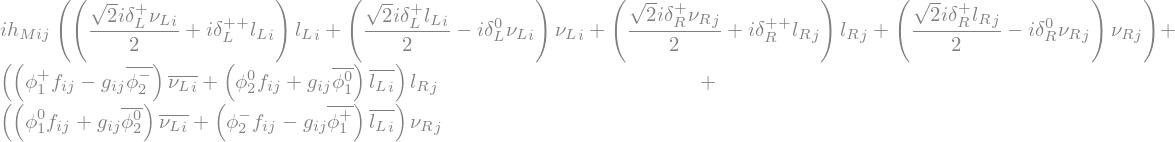

In [306]:
LY

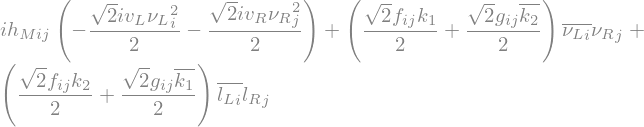

In [307]:
LY_vev = LY.subs(vevPhi).subs(vevL).subs(vevR)
LY_vev

Charged lepton mass

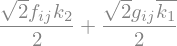

In [309]:
Ml = LY_vev.args[2].args[0]
Ml

Dirac neutrino mass

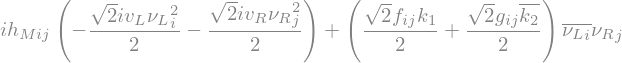

In [310]:
Lnu_mass = LY_vev.args[0] + LY_vev.args[1]
Lnu_mass